In [68]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Loading Image

In [69]:
img = cv2.imread('../ruler_img.tiff', 0)

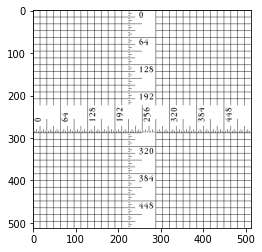

In [70]:
plt.imsave('ruler.png', img, cmap='gray')
plt.imshow(img, cmap='gray');

### Class for Mean Filter

In [71]:
class MeanFilter(object):
    ''' Class for Mean Filter '''
    
    def __init__(self, n) -> None:
        ''' Initialize the size of Mean filter as nxn '''
        self.n = n
    
    def filter(self, image:np.ndarray) -> np.ndarray:
        ''' Smooth the Image using Mean Filter. Uses a Window of size nxn. '''
        smooth_img = image.copy()
        
        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                row_start, row_end = max(0, i - (self.n//2)), i + self.n//2 + 1
                col_start, col_end = max(0, j - (self.n//2)), j + self.n//2 + 1

                smooth_img[i,j] = np.sum(image[row_start:row_end, col_start:col_end]) / (self.n**2)        
                # smooth_img[i,j,0] = np.sum(image[row_start:row_end, col_start:col_end,0]) / (self.n**2)        
                # smooth_img[i,j,1] = np.sum(image[row_start:row_end, col_start:col_end,1]) / (self.n**2)        
                # smooth_img[i,j,2] = np.sum(image[row_start:row_end, col_start:col_end,2]) / (self.n**2)        
        return smooth_img

### Implementing a 3x3 Mean Filter

In [72]:
filter_3 = MeanFilter(3)
smooth_3 = filter_3.filter(img)
    
plt.imsave('smooth_ruler_mean_filter_3x3.png', smooth_3, cmap='gray')

In [73]:
kernel_3 = (1/9) * np.ones(shape=(3,3))
print('3x3 Mean Kernel : \n', kernel_3)

smooth_3 = cv2.filter2D(src=img, ddepth=-1, kernel=kernel_3) 
plt.imsave('smooth_ruler_mean_filter_3x3_kernel.png', smooth_3, cmap='gray')

3x3 Mean Kernel : 
 [[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


### Implementing a 5x5 Mean Filter

In [74]:
filter_5 = MeanFilter(5)
smooth_5 = filter_5.filter(img)

plt.imsave('smooth_ruler_mean_filter_5x5.png', smooth_5, cmap='gray')

In [75]:
kernel_5 = (1/25) * np.ones(shape=(5,5))
print('5x5 Mean Kernel : \n', kernel_5)

smooth_5 = cv2.filter2D(src=img, ddepth=-1, kernel=kernel_5) 
plt.imsave('smooth_ruler_mean_filter_5x5_kernel.png', smooth_5, cmap='gray')

5x5 Mean Kernel : 
 [[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


### Implementation using Inbuilt Functions

#### 3x3 Mean Filter

In [76]:
smooth_3_cv = cv2.blur(src=img, ksize=(3,3))

plt.imsave('smooth_ruler_mean_filter_3x3_cv.png', smooth_3_cv, cmap='gray')

#### 5x5 Mean filter

In [77]:
smooth_5_cv = cv2.blur(src=img, ksize=(5,5))

plt.imsave('smooth_ruler_mean_filter_5x5_cv.png', smooth_5_cv, cmap='gray')